In [20]:
%matplotlib inline

import torch
import torch.nn as nn
from torchvision import datasets, transforms
import torch.optim
import torch.nn.functional as F
import numpy as np

from collections import OrderedDict
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),
                               ])

In [3]:
trainset = datasets.MNIST('MNIST_data/',download = False, train = True, transform = transform)
# testset = datasets.MNIST('MNIST_data/',download = False, train = False, transform = transform)

In [4]:
print(len(trainset))
# print(len(testset))

60000


In [5]:
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)
# testloader = torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)

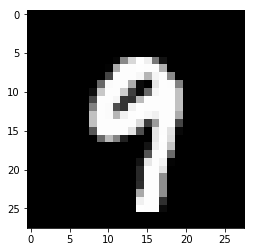

In [8]:
images,lables = next(iter(trainloader))
plt.imshow(images[0].numpy().squeeze(),cmap='Greys_r')

In [7]:
# images,lables = next(iter(testloader))
# plt.imshow(images[0].numpy().squeeze(),cmap='Greys_r')

In [9]:
# Build network

class net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,10)
    def forward(self,x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
#         x = F.softmax(x,dim=1)
        return x

In [22]:
model = net()
out = model.forward(images[0].view(1,784))
print(out)
print(F.softmax(out))
print(F.log_softmax(out))
print(np.sum(F.softmax(out).data.numpy()))

tensor([[ 0.1019, -0.0057,  0.0709, -0.0847, -0.0324, -0.2556,  0.0595,  0.0009,
          0.2437, -0.1242]], grad_fn=<ThAddmmBackward>)
tensor([[0.1101, 0.0989, 0.1067, 0.0913, 0.0963, 0.0770, 0.1055, 0.0995, 0.1269,
         0.0878]], grad_fn=<SoftmaxBackward>)
tensor([[-2.2065, -2.3141, -2.2374, -2.3931, -2.3408, -2.5639, -2.2488, -2.3074,
         -2.0646, -2.4326]], grad_fn=<LogSoftmaxBackward>)
1.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


In [25]:
model=net()

In [26]:
loss_f = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.003)

In [27]:
epochs = 3
print_every = 40
steps = 0
for e in range(epochs):
    running_loss = 0
    for images, labels in iter(trainloader):
        steps += 1
        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()
        
        # Forward and backward passes
        output = model.forward(images)
        loss = loss_f(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0

Epoch: 1/3...  Loss: 2.3064
Epoch: 1/3...  Loss: 2.2868
Epoch: 1/3...  Loss: 2.2695
Epoch: 1/3...  Loss: 2.2504
Epoch: 1/3...  Loss: 2.2327
Epoch: 1/3...  Loss: 2.2088
Epoch: 1/3...  Loss: 2.1823
Epoch: 1/3...  Loss: 2.1608
Epoch: 1/3...  Loss: 2.1237
Epoch: 1/3...  Loss: 2.0930
Epoch: 1/3...  Loss: 2.0626
Epoch: 1/3...  Loss: 2.0005
Epoch: 1/3...  Loss: 1.9803
Epoch: 1/3...  Loss: 1.9199
Epoch: 1/3...  Loss: 1.8714
Epoch: 1/3...  Loss: 1.7999
Epoch: 1/3...  Loss: 1.7376
Epoch: 1/3...  Loss: 1.6979
Epoch: 1/3...  Loss: 1.6330
Epoch: 1/3...  Loss: 1.5733
Epoch: 1/3...  Loss: 1.4765
Epoch: 1/3...  Loss: 1.4368
Epoch: 1/3...  Loss: 1.3740
Epoch: 2/3...  Loss: 0.7325
Epoch: 2/3...  Loss: 1.2708
Epoch: 2/3...  Loss: 1.1933
Epoch: 2/3...  Loss: 1.1364
Epoch: 2/3...  Loss: 1.1230
Epoch: 2/3...  Loss: 1.0968
Epoch: 2/3...  Loss: 1.0329
Epoch: 2/3...  Loss: 1.0062
Epoch: 2/3...  Loss: 0.9637
Epoch: 2/3...  Loss: 0.9239
Epoch: 2/3...  Loss: 0.9077
Epoch: 2/3...  Loss: 0.8936
Epoch: 2/3...  Loss:

[1.1446953e-06 9.5904750e-01 8.8289175e-03 1.3864480e-02 9.5824646e-05
 1.7598238e-03 8.0648484e-04 8.0624101e-04 1.4283266e-02 5.0636084e-04]
tensor(1)


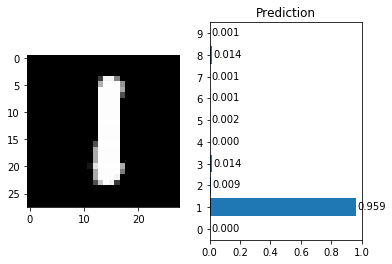

In [45]:
images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities

ps = F.softmax(logits, dim=1)

print(ps.data.numpy().squeeze())
print(labels[0])

plt.subplot(1,2,1)
plt.imshow(img.view(1,28,28).numpy().squeeze(),cmap='Greys_r')

plt.subplot(1,2,2)
plt.barh(range(10),ps.data.numpy().squeeze())
plt.xlim(0,1)
plt.ylim(-0.5,9.5) 
plt.yticks(range(10))
plt.title('Prediction')
for x,y in enumerate(ps.data.numpy().squeeze()):
    plt.text(y + 0.01, x-0.1, '{:.3f}'.format(y))